In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

In [2]:
%matplotlib inline

In [3]:
def f(t):
    """Python function to calculate a decaying sinusoid"""
#     val = np.exp(-t) * np.cos(2*np.pi*t)
    val = 1 / ((t-2.5)**2 + 1) * np.cos(4*np.pi*t)
    return val

t = np.arange(0.0, 5.0, 0.02)

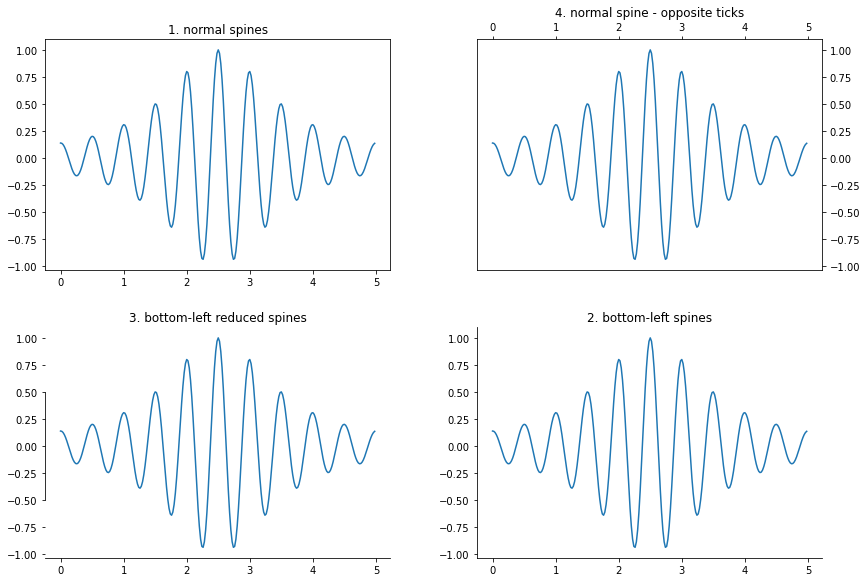

In [4]:
# Constrained layout makes sure the labels don't overlap the axes.
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_axes([0.1, 0.6, 0.4, 0.4])
ax1.plot(t, f(t))
ax1.set_title('1. normal spines')

ax2 = fig.add_axes([0.6, 0.1, 0.4, 0.4])
ax2.plot(t, f(t))
ax2.set_title('2. bottom-left spines')

ax3 = fig.add_axes([0.1, 0.1, 0.4, 0.4])
ax3.plot(t, f(t))
ax3.set_title('3. bottom-left reduced spines')

ax4 = fig.add_axes([0.6, 0.6, 0.4, 0.4])
ax4.plot(t, f(t))
ax4.set_title('4. normal spine - opposite ticks')

# Hide the right and top spines
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Only draw spine between the y-ticks
ax3.spines['left'].set_bounds(-0.5, 0.5)
# Hide the right and top spines
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

# Switching tick position
ax4.yaxis.set_ticks_position('right')
ax4.xaxis.set_ticks_position('top')

plt.show()

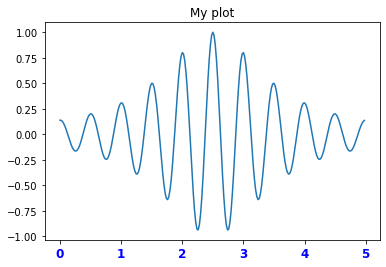

In [5]:
# Initialize the figure and subplot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, f(t))

# Set the font size via a keyword argument
ax.set_title("My plot", fontsize='large')

# Retrieve an element of a plot and set properties
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontsize('large')
    tick.set_color('blue')
    tick.set_weight('bold')

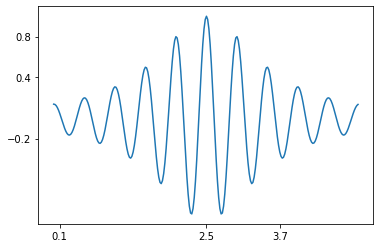

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks([0.1, 2.5, 3.7])
ax.set_yticks([-0.2, 0.4, 0.8])
ax.plot(t, f(t))

plt.show()

In [11]:
# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)
# ax.plot(t, f(t))

# ax.set_xticks([0.1, 2.5, 3.7])
# ax.set_xticklabels(['a', 'b', 'c'])
# ax.set_yticks([-0.2, 0.4, 0.8])
# ax.set_yticklabels(['first', 'second', 'third'])

# plt.show()

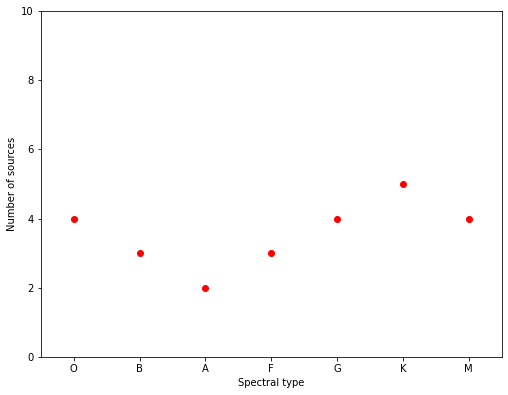

In [12]:
# Initialize figure and axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# Define spectral types
spectral_id = [1, 2, 3, 4, 5, 6, 7]
spectral_types = ['O', 'B', 'A', 'F', 'G', 'K', 'M']

# Plot the data
ax.plot(spectral_id, [4, 3, 2, 3, 4, 5, 4], 'ro')

# Set the limits
ax.set_xlim(0.5, 7.5)
ax.set_ylim(0., 10.)

# Set the custom ticks on the x-axis
ax.set_xticks(spectral_id)
ax.set_xticklabels(spectral_types)

# Set the axis labels
ax.set_xlabel("Spectral type")
ax.set_ylabel("Number of sources")

plt.show()

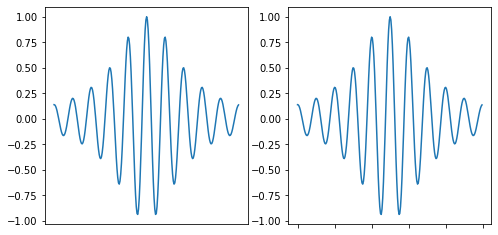

In [18]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(t,f(t))
ax2.plot(t,f(t))

ax1.set_xticks([])
ax2.set_xticklabels('')

plt.show()

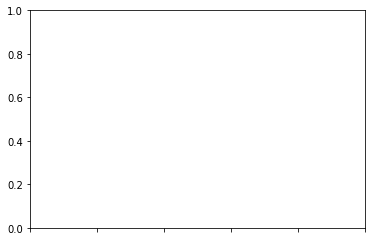

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xticklabels('')

plt.show()

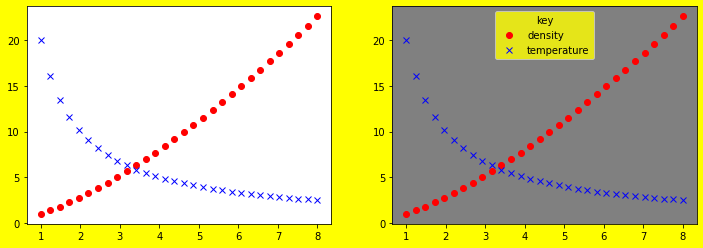

In [29]:
# facecolor is an atribute of figure, axes(plot), legend (any box)

fig = plt.figure(figsize=(12,4), facecolor='yellow')
ax1 = fig.add_subplot(1, 2, 1)
x = np.linspace(1., 8., 30)
ax1.plot(x, x ** 1.5, 'ro', label='density')
ax1.plot(x, 20/x, 'bx', label='temperature')

ax2 = fig.add_subplot(1, 2, 2, facecolor='grey')
ax2.plot(x, x ** 1.5, 'ro', label='density')
ax2.plot(x, 20/x, 'bx', label='temperature')

plt.legend(loc='best', facecolor='yellow', title='key')
# loc can be 'best' or any specfic location like 'bottom left' or 'center'

plt.show()

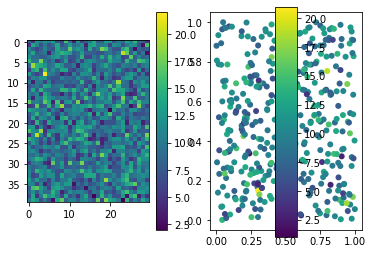

In [32]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
image = np.random.poisson(10., (40, 30))
i = ax1.imshow(image, interpolation='nearest')
fig.colorbar(i)  # note that colorbar is a method of the figure, not the axes

ax2 = fig.add_subplot(1, 2, 2)
x = np.random.random(400)
y = np.random.random(400)
c = np.random.poisson(10., 400)
s = ax2.scatter(x, y, c=c, edgecolor='none')
ax.set_xlim(0., 1.)
ax.set_ylim(0., 1.)
# i = ax2.imshow(image, interpolation='nearest')
colorbar_ax = fig.add_axes([0.7, 0.1, 0.05, 0.8])
fig.colorbar(s, cax=colorbar_ax)

# Use this ax = fig.add_axes([0.1,0.1,0.6,0.8]) //TODO


In [34]:
# fig = plt.figure()
# ax = fig.add_axes([0.1,0.1,0.6,0.8])
# image = np.random.poisson(10., (40, 30))
# i = ax.imshow(image, interpolation='nearest')
# colorbar_ax = fig.add_axes([0.7, 0.1, 0.05, 0.8])
# fig.colorbar(i, cax=colorbar_ax)
# # Try fig.colorbar?
# plt.show()

In [33]:
# fig = plt.figure()
# ax = fig.add_axes([0.1, 0.1, 0.6, 0.8])
# x = np.random.random(400)
# y = np.random.random(400)
# c = np.random.poisson(10., 400)
# s = ax.scatter(x, y, c=c, edgecolor='none')
# ax.set_xlim(0., 1.)
# ax.set_ylim(0., 1.)
# colorbar_ax = fig.add_axes([0.7, 0.1, 0.05, 0.8])
# fig.colorbar(s, cax=colorbar_ax)

In [35]:
# import matplotlib.pyplot as plt

# fig = plt.figure(figsize=(12,8))
# ax = fig.add_subplot(111)
# fig.subplots_adjust(top=0.85)

# # Set titles for the figure and the subplot respectively
# fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')
# ax.set_title('axes title')

# ax.set_xlabel('xlabel', fontsize = 15)
# ax.set_ylabel('ylabel', fontsize = 15)

# # Set both x- and y-axis limits to [0, 10] instead of default [0, 1]
# ax.axis([0, 10, 0, 10])

# # ax.text(x, y, string, optional arguments, bbox={} (optional dictionary arguments))
# # Try plot.text?
# ax.text(3, 8, 'boxed italics text in data coords', style='italic',
#         bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

# # The r signifies that the string is a raw string and not to treate backslashes as python escapes.
# ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)

# ax.text(3, 2, 'Somewhere')

# ax.text(0.95, 0.01, 'colored text in axes coords',
#         verticalalignment='bottom', horizontalalignment='right',
#         transform=ax.transAxes,
#         color='green', fontsize=15)

# ax.plot([2], [1], 'o')
# ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
#             arrowprops=dict(facecolor='black', shrink=0.05))

# plt.show()

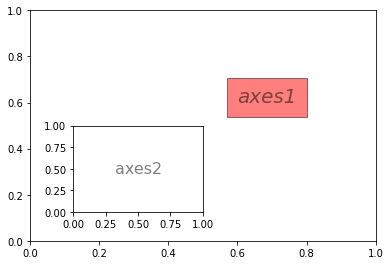

In [17]:
fig = plt.figure()

ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax2 = fig.add_axes([0.2,0.2,0.3,0.3])

# ax1.set_xticks([])
# ax1.set_yticks([])
# ax2.set_xticks([])
# ax2.set_yticks([])
 
ax1.text(0.6, 0.6, 'axes1', size=20, alpha=0.5, style='italic', bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
# 0.6, 0.6 is the location w.r.t ax1.
# 'axes1' is the text to be discplayed
# size is the fontsize
# aplha represents the opacity (0 is transparent, 1 is opaque)
# style can be 'bold', 'italic' or 'oblique'
# bbox is a dictonary containing the features of the bounding box of the text

ax2.text(0.5,0.5, 'axes2',ha='center',va='center',size=16,alpha=.5)
# ha is horizontal alignment, i.e., 0.5 is the horizontal midpoint of the text
# va is vertical alignment, i.e., 0.5 is the vertical midpoint of the text

plt.show()

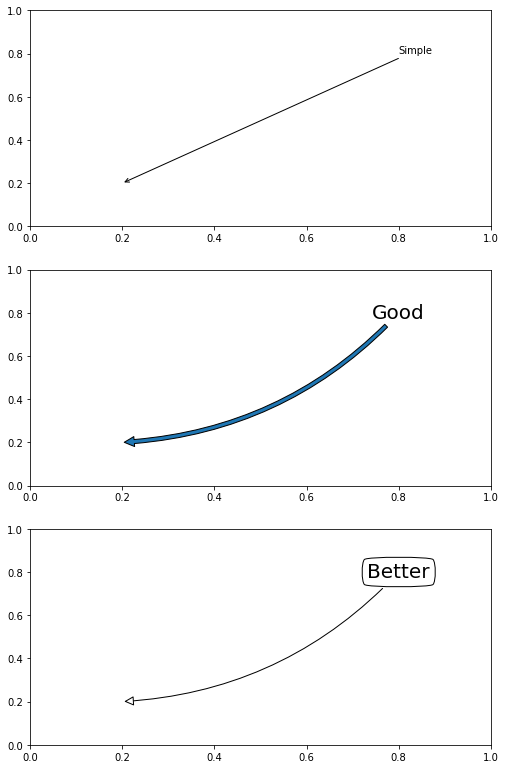

In [18]:
fig = plt.figure(figsize=(8,12))
ax1 = fig.add_axes([0.1, 0.7, 0.8, 0.25])
ax2 = fig.add_axes([0.1, 0.4, 0.8, 0.25])
ax3 = fig.add_axes([0.1, 0.1, 0.8, 0.25])

ax1.annotate('Simple',
            xy=(0.2, 0.2), xycoords='data',
            xytext=(0.8, 0.8), textcoords='data',
            arrowprops=dict(arrowstyle='->',
                            connectionstyle='arc3'),
            )

ax2.annotate('Good',
            xy=(0.2, 0.2), xycoords='data',
            xytext=(0.8, 0.8), textcoords='data',
            size=20, va='center', ha='center',
            arrowprops=dict(arrowstyle='simple',
                            connectionstyle='arc3,rad=-0.2'),
            )

ax3.annotate('Better',
                  xy=(0.2, 0.2), xycoords='data',
                  xytext=(0.8, 0.8), textcoords='data',
                  size=20, va='center', ha='center',
                  bbox=dict(boxstyle='round4', fc='w'),
                  arrowprops=dict(arrowstyle='-|>',
                                  connectionstyle='arc3,rad=-0.2',
                                  fc='w'),
                  )

plt.show()

In [ ]:
# Ellipses// Patches and 
# e1 = patches.Ellipse((xcenter, ycenter), width, height,
                     angle=angle, linewidth=2, fill=False, zorder=2)
# https://matplotlib.org/3.1.1/gallery/units/ellipse_with_units.html#sphx-glr-gallery-units-ellipse-with-units-py